## Panic at the Data

In [27]:
# Dependencies
import requests
import json
#from configET import nyt_api_key
from pprint import pprint
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key='LZCTQ8JHH9RXXFMJ',output_format='pandas')

# New York Times Most Popular: Erendiz

In [2]:
# ****DO NOT RUN THIS AGAIN***** 
#Request articles from NYT Most Popular API from 1,7, and 30 days ago 
#LAST RUN ON 4/13/2020 AKA '041320'
# today = date.today()
# date = today.strftime("%m%d%y")

# periods = [1,7,30]

# #loop through periods

# for period in periods:
#     #set urls
#     most_emailed_url = f"https://api.nytimes.com/svc/mostpopular/v2/emailed/{period}.json?"
#     most_viewed_url = f"https://api.nytimes.com/svc/mostpopular/v2/viewed/{period}.json?"
#     most_shared_url = f"https://api.nytimes.com/svc/mostpopular/v2/shared/{period}.json?"
#     most_urls = [most_emailed_url,most_viewed_url,most_shared_url]
    
#     #loop through urls and store responses
    
#     most_responses = []
#     for u in most_urls:
#         query_url = u + "api-key=" + nyt_api_key
#         # Request articles
#         most_responses.append(requests.get(query_url).json())
    
#     #as of 4/13/2020 (3/14/2020-4/13/2020)
#     #pull results from list
#     most_emailed = most_responses[0]
#     most_viewed = most_responses[1]
#     most_shared = most_responses[2]
    
#     #create dataframes
#     most_emailed_df = pd.DataFrame(most_emailed['results'])
#     most_viewed_df = pd.DataFrame(most_viewed['results'])
#     most_shared_df = pd.DataFrame(most_shared['results'])

#     #save as CSVs
#     most_emailed_df.to_csv(f'most_emailed_{period}_{date}.csv') # monthdayyear
#     most_viewed_df.to_csv(f'most_viewed_{period}_{date}.csv') # monthdayyear
#     most_shared_df.to_csv(f'most_shared_{period}_{date}.csv') # monthdayyear


In [3]:
#info we want: asset_id keywords, title, published_date, url, resave partial data frame to csv
period = 30
date = '041320' # '041320'
#read CSVs and create partial data frame with relevant info
most_emailed_df = pd.read_csv(f'data/full_csv/most_emailed_{period}_{date}.csv')
most_emailed_df = most_emailed_df[['title','asset_id','adx_keywords','published_date','url']]


most_viewed_df = pd.read_csv(f'data/full_csv/most_viewed_{period}_{date}.csv')
most_viewed_df = most_viewed_df[['title','asset_id','adx_keywords','published_date','url']]

most_shared_df = pd.read_csv(f'data/full_csv/most_shared_{period}_{date}.csv')
most_shared_df = most_shared_df[['title','asset_id','adx_keywords','published_date','url']]

#save partial dataframe as CSV
most_emailed_df.to_csv(f'data/most_emailed_partial_{period}_{date}.csv') # monthdayyear 
most_viewed_df.to_csv(f'data/most_viewed_partial_{period}_{date}.csv') # monthdayyear
most_shared_df.to_csv(f'data/most_shared_partial_{period}_{date}.csv') # monthdayyear

In [4]:
dataframes = [most_emailed_df,most_viewed_df,most_shared_df]
for data in dataframes:
    data.sort_values(by="published_date",ascending = True, inplace=True)
    #make keywords a list
    first_keyword = []
    contains_covid19 = []
    for index,row in data.iterrows():
        key_list = row['adx_keywords'].split(';')
        if key_list[0] == 'Coronavirus (2019-nCoV)':
            first_keyword.append(True)
        else:
            first_keyword.append(False)
       
        if 'Coronavirus (2019-nCoV)' in key_list:
            contains_covid19.append(True)
        else:
            contains_covid19.append(False)
    data['first_keyword'] = first_keyword
    data['about_covid19'] = contains_covid19
    
most_emailed_df = most_emailed_df[['asset_id','title','published_date','first_keyword','about_covid19']]
most_viewed_df = most_viewed_df[['asset_id','title','published_date','first_keyword','about_covid19']]
most_shared_df = most_shared_df[['asset_id','title','published_date','first_keyword','about_covid19']]
most_emailed_df.head()

,asset_id,title,published_date,first_keyword,about_covid19
7,100000006981425,You’re Retired. Should You Rent or Buy Your Home?,2020-03-12,False,False
11,100000007033084,A Complete List of Trump’s Attempts to Play Do...,2020-03-15,False,True
19,100000007039743,How Long Will Coronavirus Live on Surfaces or ...,2020-03-17,False,True
13,100000007030204,Camus on the Coronavirus,2020-03-19,False,True
8,100000007042395,Translating a Surveillance Tool into a Virus T...,2020-03-19,True,True


In [5]:
#Top Engagement:
most_engaged_df = pd.merge(most_emailed_df,most_viewed_df, on='asset_id', how='inner')
most_engaged_df = pd.merge(most_engaged_df,most_shared_df, on='asset_id', how='inner')
most_engaged_df.head()

,asset_id,title_x,published_date_x,first_keyword_x,about_covid19_x,title_y,published_date_y,first_keyword_y,about_covid19_y,title,published_date,first_keyword,about_covid19
0,100000007048672,"F.A.Q. on Stimulus Checks, Unemployment and th...",2020-03-26,True,True,"F.A.Q. on Stimulus Checks, Unemployment and th...",2020-03-26,True,True,"F.A.Q. on Stimulus Checks, Unemployment and th...",2020-03-26,True,True
1,100000007063748,Putting Jared Kushner In Charge Is Utter Madness,2020-04-02,True,True,Putting Jared Kushner In Charge Is Utter Madness,2020-04-02,True,True,Putting Jared Kushner In Charge Is Utter Madness,2020-04-02,True,True


# New York Times Covid-19 Comments: John

In [28]:
# 'https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0&url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F21%2Fscience%2Fgiant-squid-cephalopod-video.html&commentSequence=101073483&offset=0'
NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0&url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F21%2Fscience%2Fgiant-squid-cephalopod-video.html"
ny_api_key = "YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV"
Reply_url = NYT_com_baseurl + "&commentSequence=101073483&offset=0"
Reply_url

'https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0&url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F21%2Fscience%2Fgiant-squid-cephalopod-video.html&commentSequence=101073483&offset=0'

In [29]:
print(requests.get(NYT_com_baseurl))
print(requests.get(Reply_url))

<Response [200]>
<Response [200]>


In [30]:
#print(requests.get(NYT_com_baseurl).json())
response = requests.get(NYT_com_baseurl).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [31]:
response2 = requests.get(Reply_url).json()
# print(json.dumps(response2, indent=4, sort_keys=True))

In [32]:
response = requests.get(NYT_com_baseurl)
response_json = response.json()
number_comments = len(response_json["results"]["comments"])
print(number_comments)

25


In [33]:
response2 = requests.get(Reply_url)
response_json2 = response2.json()
total_comments_found = (response_json2["results"]["totalCommentsFound"])
print(total_comments_found)

102


In [34]:
article_search = "https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Covid+19&page=1&sort=newest&api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV"
response = requests.get(article_search).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "copyright": "Copyright (c) 2020 The New York Times Company. All Rights Reserved.",
    "response": {
        "docs": [
            {
                "_id": "nyt://article/084634a5-f0f9-51d0-bfaf-a7978ad0b3ed",
                "abstract": "Kyle Chalmers stunned the swimming world when he stormed to gold in the 100 metres freestyle at the Rio Olympics and the Australian believes greatness awaits if he can retain his title in Tokyo next year. ",
                "byline": {
                    "organization": "Reuters",
                    "original": "By Reuters",
                    "person": []
                },
                "document_type": "article",
                "headline": {
                    "content_kicker": null,
                    "kicker": null,
                    "main": "Olympics: Ambition Deferred, Chalmers Eyes Greatness at 'Biggest' Games",
                    "name": null,
                    "print_headline": "Olympics: Ambition Deferred, Chalmers Eyes 

In [35]:
response3 = requests.get(article_search)
response_json3 = response3.json()
web_url = (response_json3)
web_url = web_url['response']["docs"]

In [36]:
len(web_url)

10

In [37]:
for x in range(len(web_url)):
    print(web_url[x]["web_url"])


https://www.nytimes.com/reuters/2020/04/16/sports/olympics/16reuters-swimming-olympics-chalmers.html
https://www.nytimes.com/reuters/2020/04/16/world/asia/16reuters-china-economy-gdp-instantview.html
https://www.nytimes.com/reuters/2020/04/16/business/16reuters-health-coronavirus-china-business.html
https://www.nytimes.com/aponline/2020/04/16/health/ap-as-med-virus-outbreak-alternative-medicines.html
https://www.nytimes.com/2020/04/16/business/china-coronavirus-economy.html
https://www.nytimes.com/aponline/2020/04/16/us/ap-us-virus-outbreak-protests.html
https://www.nytimes.com/reuters/2020/04/16/sports/olympics/16reuters-health-coronavirus-doping-usada.html
https://www.nytimes.com/2020/04/16/smarter-living/coronavirus-introverts-lonely.html
https://www.nytimes.com/reuters/2020/04/16/us/16reuters-health-coronavirus-usa-new-jersey.html
https://www.nytimes.com/2020/04/16/us/massachusetts-bomb-jewish-nursing-home.html


In [38]:
List_of_urls = []
for x in range(len(web_url)):
    List_of_urls.append(web_url[x]["web_url"])
List_of_urls

['https://www.nytimes.com/reuters/2020/04/16/sports/olympics/16reuters-swimming-olympics-chalmers.html',
 'https://www.nytimes.com/reuters/2020/04/16/world/asia/16reuters-china-economy-gdp-instantview.html',
 'https://www.nytimes.com/reuters/2020/04/16/business/16reuters-health-coronavirus-china-business.html',
 'https://www.nytimes.com/aponline/2020/04/16/health/ap-as-med-virus-outbreak-alternative-medicines.html',
 'https://www.nytimes.com/2020/04/16/business/china-coronavirus-economy.html',
 'https://www.nytimes.com/aponline/2020/04/16/us/ap-us-virus-outbreak-protests.html',
 'https://www.nytimes.com/reuters/2020/04/16/sports/olympics/16reuters-health-coronavirus-doping-usada.html',
 'https://www.nytimes.com/2020/04/16/smarter-living/coronavirus-introverts-lonely.html',
 'https://www.nytimes.com/reuters/2020/04/16/us/16reuters-health-coronavirus-usa-new-jersey.html',
 'https://www.nytimes.com/2020/04/16/us/massachusetts-bomb-jewish-nursing-home.html']

In [39]:
archive_url = "https://api.nytimes.com/svc/archive/v1/2018/12.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV" 
print(requests.get(archive_url))

<Response [200]>


In [40]:
#print(requests.get(NYT_com_baseurl).json())
#requests.get(archive_url).json()

In [41]:
# this will return the total comments found for each url in List_of_urls, however the api can only request 10 per minuite.

api_key = "YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0"
# NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0&url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F21%2Fscience%2Fgiant-squid-cephalopod-video.html"

NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=" + api_key
for y in List_of_urls:
    query_url = NYT_com_baseurl + "&offset=0&url=" + y
    try:
        response3 = requests.get(query_url)
        response_json3 = response3.json()
#         print(response_json3[y]["web_url"])
        print(response_json3["results"]["totalCommentsFound"])
#         print([List_of_urls])
    except:
        print("NaN comments")
        

#     total_comments_found = (response_json3)

# print(total_comments_found)
    
# print(requests.get(NYT_com_baseurl))

0
0
0
0
0
0
0
0
0
0


In [43]:
most_emailed_csv = pd.read_csv("data/most_emailed_partial_30_041320.csv")
# print(most_emailed_csv["url"])
list_of_most_emailed = []
list_of_comments = []
list_of_most_emailed = list_of_most_emailed + most_emailed_csv["url"].tolist()
list_of_most_emailed

['https://www.nytimes.com/article/how-to-make-face-mask-coronavirus.html',
 'https://www.nytimes.com/2020/04/01/opinion/coronavirus-viral-dose.html',
 'https://www.nytimes.com/2020/03/21/opinion/scott-kelly-coronavirus-isolation.html',
 'https://www.nytimes.com/2020/03/22/opinion/coronavirus-economy.html',
 'https://www.nytimes.com/2020/04/08/business/coronavirus-jigsaw-puzzles.html',
 'https://www.nytimes.com/2020/03/20/opinion/sunday/coronavirus-outcomes.html',
 'https://www.nytimes.com/2020/03/24/magazine/coronavirus-family.html',
 'https://www.nytimes.com/2020/03/12/business/retirement-rent-buy-home.html',
 'https://www.nytimes.com/2020/03/19/us/coronavirus-location-tracking.html',
 'https://www.nytimes.com/article/coronavirus-stimulus-package-questions-answers.html',
 'https://www.nytimes.com/2020/03/19/opinion/coronavirus-isolation.html',
 'https://www.nytimes.com/2020/03/15/opinion/trump-coronavirus.html',
 'https://www.nytimes.com/2020/03/31/opinion/coronavirus-n95-mask.html',


In [45]:
# need to find a way to request more than 10 
api_key = "YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0"
set_counter = 0
# NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0&url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F21%2Fscience%2Fgiant-squid-cephalopod-video.html"

NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key="
for y in list_of_most_emailed:
    query_url = NYT_com_baseurl + api_key + "&offset=0&url=" + y
    try:
        response3 = requests.get(query_url)
        response_json3 = response3.json()
#         print(response_json3[y]["web_url"])
        print(response_json3["results"]["totalCommentsFound"])
        list_of_comments.append(response_json3["results"]["totalCommentsFound"])
        set_counter += 1
        if set_counter == 10:
            api_key = "tQd4A0I8OkGWs5mugNBAEDhASwU4NpNp"
    except:
        print("NaN comments")

0
0
0
1906
234
884
1163
183
0
991
1088
1892
1012
0
0
3274
48
0
1030
0


In [46]:
list_of_comments
mostemailed_url_and_comments = pd.DataFrame(
    {'most emailed URLs': list_of_most_emailed,
     'Total Comments': list_of_comments})
mostemailed_url_and_comments

,most emailed URLs,Total Comments
0,https://www.nytimes.com/article/how-to-make-fa...,0
1,https://www.nytimes.com/2020/04/01/opinion/cor...,0
2,https://www.nytimes.com/2020/03/21/opinion/sco...,0
3,https://www.nytimes.com/2020/03/22/opinion/cor...,1906
4,https://www.nytimes.com/2020/04/08/business/co...,234
5,https://www.nytimes.com/2020/03/20/opinion/sun...,884
6,https://www.nytimes.com/2020/03/24/magazine/co...,1163
7,https://www.nytimes.com/2020/03/12/business/re...,183
8,https://www.nytimes.com/2020/03/19/us/coronavi...,0
9,https://www.nytimes.com/article/coronavirus-st...,991


In [49]:
most_emailed_csv = most_emailed_csv.merge(mostemailed_url_and_comments, left_on="url", right_on="most emailed URLs")
most_emailed_csv.to_csv('data/most_emailed_comments.csv')
most_emailed_csv.head()

,Unnamed: 0,title,asset_id,adx_keywords,published_date,url,most emailed URLs_x,Total Comments_x,most emailed URLs_y,Total Comments_y
0,0,How to Make a Face Mask,100000007058106,Sewing;Coronavirus (2019-nCoV);Do It Yourself;...,2020-03-31,https://www.nytimes.com/article/how-to-make-fa...,https://www.nytimes.com/article/how-to-make-fa...,0,https://www.nytimes.com/article/how-to-make-fa...,0
1,1,These Coronavirus Exposures Might Be the Most ...,100000007062102,Coronavirus (2019-nCoV);Vaccination and Immuni...,2020-04-01,https://www.nytimes.com/2020/04/01/opinion/cor...,https://www.nytimes.com/2020/04/01/opinion/cor...,0,https://www.nytimes.com/2020/04/01/opinion/cor...,0
2,2,"I Spent a Year in Space, and I Have Tips on Is...",100000007045625,Coronavirus (2019-nCoV);Space and Astronomy;Qu...,2020-03-21,https://www.nytimes.com/2020/03/21/opinion/sco...,https://www.nytimes.com/2020/03/21/opinion/sco...,0,https://www.nytimes.com/2020/03/21/opinion/sco...,0
3,3,A Plan to Get America Back to Work,100000007047869,Quarantines;Shutdowns (Institutional);Coronavi...,2020-03-22,https://www.nytimes.com/2020/03/22/opinion/cor...,https://www.nytimes.com/2020/03/22/opinion/cor...,1906,https://www.nytimes.com/2020/03/22/opinion/cor...,1906
4,4,Here’s How Those Hot Jigsaw Puzzles Are Made,100000007063931,Puzzles;Coronavirus (2019-nCoV);Quarantines,2020-04-08,https://www.nytimes.com/2020/04/08/business/co...,https://www.nytimes.com/2020/04/08/business/co...,234,https://www.nytimes.com/2020/04/08/business/co...,234


In [50]:
most_shared_csv = pd.read_csv("data/most_shared_partial_30_041320.csv")
# print(most_emailed_csv["url"])
list_of_most_shared = []
list_of_comments = []
list_of_most_shared = list_of_most_shared + most_shared_csv["url"].tolist()
list_of_most_shared

['https://www.nytimes.com/2020/03/14/technology/coronavirus-purell-wipes-amazon-sellers.html',
 'https://www.nytimes.com/2020/03/26/health/usa-coronavirus-cases.html',
 'https://www.nytimes.com/2020/03/18/nyregion/new-jersey-family-coronavirus.html',
 'https://www.nytimes.com/2020/04/02/opinion/jared-kushner-coronavirus.html',
 'https://www.nytimes.com/article/coronavirus-stimulus-package-questions-answers.html',
 'https://www.nytimes.com/2020/03/29/us/politics/coronavirus-liberty-university-falwell.html',
 'https://www.nytimes.com/2020/03/28/technology/coronavirus-fauci-trump-conspiracy-target.html',
 'https://www.nytimes.com/2020/03/23/us/chinese-coronavirus-racist-attacks.html',
 'https://www.nytimes.com/2020/04/02/world/coronavirus-live-news-updates.html',
 'https://www.nytimes.com/2020/03/22/health/coronavirus-symptoms-smell-taste.html',
 'https://www.nytimes.com/2020/04/04/world/europe/germany-coronavirus-death-rate.html',
 'https://www.nytimes.com/2020/04/08/us/politics/bernie-s

In [51]:
# need to find a way to request more than 10 
api_key = "YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0"
set_counter = 0
# NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0&url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F21%2Fscience%2Fgiant-squid-cephalopod-video.html"

NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key="
for y in list_of_most_shared:
    query_url = NYT_com_baseurl + api_key + "&offset=0&url=" + y
    try:
        response3 = requests.get(query_url)
        response_json3 = response3.json()
#         print(response_json3[y]["web_url"])
        print(response_json3["results"]["totalCommentsFound"])
        list_of_comments.append(response_json3["results"]["totalCommentsFound"])
        set_counter += 1
        if set_counter == 10:
            api_key = "tQd4A0I8OkGWs5mugNBAEDhASwU4NpNp"
    except:
        print("NaN comments")

4408
0
596
3274
991
682
2915
1376
1479
266
0
4497
1255
43
0
530
0
114
0
0


In [52]:
list_of_comments
mostshared_url_and_comments = pd.DataFrame(
    {'most shared URLs': list_of_most_shared,
     'Total Comments': list_of_comments})
mostshared_url_and_comments


,most shared URLs,Total Comments
0,https://www.nytimes.com/2020/03/14/technology/...,4408
1,https://www.nytimes.com/2020/03/26/health/usa-...,0
2,https://www.nytimes.com/2020/03/18/nyregion/ne...,596
3,https://www.nytimes.com/2020/04/02/opinion/jar...,3274
4,https://www.nytimes.com/article/coronavirus-st...,991
5,https://www.nytimes.com/2020/03/29/us/politics...,682
6,https://www.nytimes.com/2020/03/28/technology/...,2915
7,https://www.nytimes.com/2020/03/23/us/chinese-...,1376
8,https://www.nytimes.com/2020/04/02/world/coron...,1479
9,https://www.nytimes.com/2020/03/22/health/coro...,266


In [54]:
most_shared_csv = most_shared_csv.merge(mostshared_url_and_comments, left_on="url", right_on="most shared URLs")
most_shared_csv.to_csv('data/most_shared_comments.csv')
most_shared_csv.head()

,Unnamed: 0,title,asset_id,adx_keywords,published_date,url,most shared URLs_x,Total Comments_x,most shared URLs_y,Total Comments_y
0,0,"He Has 17,700 Bottles of Hand Sanitizer and No...",100000007029870,"Coronavirus (2019-nCoV);Prices (Fares, Fees an...",2020-03-14,https://www.nytimes.com/2020/03/14/technology/...,https://www.nytimes.com/2020/03/14/technology/...,4408,https://www.nytimes.com/2020/03/14/technology/...,4408
1,1,The U.S. Now Leads the World in Confirmed Coro...,100000007056143,Politics and Government;United States Internat...,2020-03-26,https://www.nytimes.com/2020/03/26/health/usa-...,https://www.nytimes.com/2020/03/26/health/usa-...,0,https://www.nytimes.com/2020/03/26/health/usa-...,0
2,2,Coronavirus Ravages 7 Members of a Single Fami...,100000007041449,Coronavirus (2019-nCoV);Quarantines;Deaths (Fa...,2020-03-18,https://www.nytimes.com/2020/03/18/nyregion/ne...,https://www.nytimes.com/2020/03/18/nyregion/ne...,596,https://www.nytimes.com/2020/03/18/nyregion/ne...,596
3,3,Putting Jared Kushner In Charge Is Utter Madness,100000007063748,Coronavirus (2019-nCoV);Epidemics;United State...,2020-04-02,https://www.nytimes.com/2020/04/02/opinion/jar...,https://www.nytimes.com/2020/04/02/opinion/jar...,3274,https://www.nytimes.com/2020/04/02/opinion/jar...,3274
4,4,"F.A.Q. on Stimulus Checks, Unemployment and th...",100000007048672,"Coronavirus (2019-nCoV);Coronavirus Aid, Relie...",2020-03-26,https://www.nytimes.com/article/coronavirus-st...,https://www.nytimes.com/article/coronavirus-st...,991,https://www.nytimes.com/article/coronavirus-st...,991


In [62]:
most_viewed_csv = pd.read_csv("data/most_viewed_partial_30_041320.csv")
# print(most_emailed_csv["url"])
list_of_most_viewed = []
list_of_comments = []
list_of_most_viewed = list_of_most_viewed + most_viewed_csv["url"].tolist()
list_of_most_viewed

AttributeError: 'list' object has no attribute 'head'

In [57]:
# need to find a way to request more than 10 
api_key = "YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0"
set_counter = 0
# NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=YoalmWwTHLC4b42p0NXOPc1pS1MAdKXV&offset=0&url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F21%2Fscience%2Fgiant-squid-cephalopod-video.html"

NYT_com_baseurl = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key="
for y in list_of_most_viewed:
    query_url = NYT_com_baseurl + api_key + "&offset=0&url=" + y
    try:
        response3 = requests.get(query_url)
        response_json3 = response3.json()
#         print(response_json3[y]["web_url"])
        print(response_json3["results"]["totalCommentsFound"])
        list_of_comments.append(response_json3["results"]["totalCommentsFound"])
        set_counter += 1
        if set_counter == 10:
            api_key = "tQd4A0I8OkGWs5mugNBAEDhASwU4NpNp"
    except:
        print("NaN comments")

4408
991
596
0
0
3274
0
266
1583
0
529
682
997
2915
43
0
4497
1255
2447
2000


In [61]:
list_of_comments
mostviewed_url_and_comments = pd.DataFrame(
    {'most viewed URLs': list_of_most_viewed,
     'Total Comments': list_of_comments})
mostviewed_url_and_comments.head()

,most viewed URLs,Total Comments
0,https://www.nytimes.com/2020/03/14/technology/...,4408
1,https://www.nytimes.com/article/coronavirus-st...,991
2,https://www.nytimes.com/2020/03/18/nyregion/ne...,596
3,https://www.nytimes.com/2020/03/26/health/usa-...,0
4,https://www.nytimes.com/2020/04/05/style/coron...,0


In [63]:
most_viewed_csv = most_viewed_csv.merge(mostviewed_url_and_comments, left_on="url", right_on="most viewed URLs")
most_viewed_csv.to_csv("data/most_viewed_comments.csv")
most_viewed_csv.head()

,Unnamed: 0,title,asset_id,adx_keywords,published_date,url,most viewed URLs,Total Comments
0,0,"He Has 17,700 Bottles of Hand Sanitizer and No...",100000007029870,"Coronavirus (2019-nCoV);Prices (Fares, Fees an...",2020-03-14,https://www.nytimes.com/2020/03/14/technology/...,https://www.nytimes.com/2020/03/14/technology/...,4408
1,1,"F.A.Q. on Stimulus Checks, Unemployment and th...",100000007048672,"Coronavirus (2019-nCoV);Coronavirus Aid, Relie...",2020-03-26,https://www.nytimes.com/article/coronavirus-st...,https://www.nytimes.com/article/coronavirus-st...,991
2,2,Coronavirus Ravages 7 Members of a Single Fami...,100000007041449,Coronavirus (2019-nCoV);Quarantines;Deaths (Fa...,2020-03-18,https://www.nytimes.com/2020/03/18/nyregion/ne...,https://www.nytimes.com/2020/03/18/nyregion/ne...,596
3,3,The U.S. Now Leads the World in Confirmed Coro...,100000007056143,Politics and Government;United States Internat...,2020-03-26,https://www.nytimes.com/2020/03/26/health/usa-...,https://www.nytimes.com/2020/03/26/health/usa-...,0
4,4,They Were the Last Couple in Paradise. Now The...,100000007065951,Travel and Vacations;Airlines and Airplanes;Tr...,2020-04-05,https://www.nytimes.com/2020/04/05/style/coron...,https://www.nytimes.com/2020/04/05/style/coron...,0


# Stock Market Data: Hope

In [64]:
AAPL_data, metadata=ts.get_daily('AAPL',outputsize='full')
AAPL_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,174.828749,176.701385,172.793762,174.797570,2.402082e+07
std,161.151273,162.472990,159.594713,161.060405,1.833513e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,55.365000,56.925000,54.515000,55.640000,1.037210e+07
50%,123.210000,124.900000,121.500000,123.000000,2.057140e+07
75%,218.065000,220.805000,216.190000,218.090000,3.227100e+07
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08


In [65]:
IBM_data, metadata=ts.get_daily('IBM',outputsize='full')
IBM_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,129.665566,130.827587,128.604047,129.737569,6.084190e+06
std,38.409357,38.474498,38.341960,38.413586,3.309150e+06
min,54.650000,56.700000,54.010000,55.070000,1.928430e+05
25%,94.000000,95.025000,93.055000,94.105000,3.845659e+06
50%,126.220000,127.350000,125.060000,126.390000,5.261444e+06
75%,159.640000,160.705000,158.500000,159.530000,7.370150e+06
max,215.380000,215.900000,214.300000,215.800000,4.120730e+07


In [66]:
AMZN_data, metadata=ts.get_daily('AMZN',outputsize='full')
AMZN_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-04-16,2346.00,2461.00,2335.00,2408.19,11813886.0
2020-04-15,2257.68,2333.37,2245.00,2307.68,6866567.0
2020-04-14,2200.47,2292.00,2186.21,2283.32,8087193.0
2020-04-13,2040.00,2180.00,2038.00,2168.87,6716709.0
2020-04-09,2044.30,2053.00,2017.66,2042.76,4655617.0
...,...,...,...,...,...
2000-04-24,49.38,51.56,44.88,49.81,6693300.0
2000-04-20,53.38,53.69,49.88,52.38,4925300.0
2000-04-19,55.31,55.31,51.69,53.44,5373800.0


In [67]:
WMT_data, metadata=ts.get_daily('WMT',outputsize='full')
WMT_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-04-16,129.00,132.92,128.2500,132.33,10499787.0
2020-04-15,129.00,129.88,127.1200,128.76,7473419.0
2020-04-14,127.10,129.79,126.0352,129.00,11354477.0
2020-04-13,121.27,125.67,121.1700,125.30,8054436.0
2020-04-09,118.22,122.87,117.6600,121.80,10942776.0
...,...,...,...,...,...
2000-04-24,57.94,60.63,57.5000,58.88,5633700.0
2000-04-20,55.13,57.94,55.1300,57.69,6090400.0
2000-04-19,54.13,55.50,53.7500,54.94,6255300.0


In [68]:
AAL_data, metadata=ts.get_daily('AAL',outputsize='full')
AAL_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-04-16,11.91,12.03,11.05,11.070,76814465.0
2020-04-15,12.52,12.69,11.39,12.290,124719945.0
2020-04-14,12.22,12.60,11.75,11.945,68039491.0
2020-04-13,12.90,12.95,11.25,11.560,73385533.0
2020-04-09,12.64,13.40,11.82,12.510,117592821.0
...,...,...,...,...,...
2005-10-03,20.90,21.75,20.90,21.500,2836193.0
2005-09-30,20.26,21.05,20.18,21.010,8373458.0
2005-09-29,20.40,20.58,20.10,20.210,2890617.0


In [69]:
ANTM_data, metadata=ts.get_daily('ANTM',outputsize='full')
ANTM_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-04-16,254.51,273.390,250.62,271.84,2717241.0
2020-04-15,249.15,254.350,245.11,250.47,2424142.0
2020-04-14,245.76,254.190,245.24,252.01,2145550.0
2020-04-13,240.78,243.490,237.65,240.53,1036639.0
2020-04-09,240.94,248.055,239.93,242.46,2191205.0
...,...,...,...,...,...
2001-01-08,100.80,104.000,100.30,102.60,439800.0
2001-01-05,97.88,102.400,96.25,100.20,1086700.0
2001-01-04,107.00,109.300,95.50,96.81,1982000.0


In [70]:
PFE_data, metadata=ts.get_daily('PFE',outputsize='full')
PFE_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-04-16,36.12,36.2600,35.575,35.88,19476923.0
2020-04-15,36.06,36.2300,35.580,35.97,20217766.0
2020-04-14,35.93,36.6300,35.335,36.44,20721415.0
2020-04-13,35.96,35.9800,34.720,35.14,17327516.0
2020-04-09,35.03,35.7673,34.850,35.39,29074991.0
...,...,...,...,...,...
2000-04-24,41.50,44.2500,41.250,43.50,14900400.0
2000-04-20,42.13,42.1300,40.750,41.50,10864700.0
2000-04-19,39.69,42.5000,39.380,41.81,20078700.0


# Covid-19 Cases and VIX: Joe

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import time
import datetime as dt
import calendar

# Import CSV data files
full_data = "data/full_data.csv"
vix_data = "data/vixcurrent.csv"

# Read data files
full_data = pd.read_csv(full_data)
vix_data = pd.read_csv(vix_data)

world_cv_df = full_data.loc[full_data['location'] == 'World']
us_cv_df = full_data.loc[full_data['location'] == 'United States']
vix_data

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61
...,...,...,...,...,...
4093,04/07/2020,44.83,47.51,43.51,46.70
4094,04/08/2020,45.90,47.28,42.53,43.35
4095,04/09/2020,43.00,45.73,41.39,41.67
4096,04/13/2020,44.60,45.04,41.17,41.17


In [72]:
vix_date = vix_data['Date']

nvix_date = []
for item in vix_date:
    nv_date = time.mktime(dt.datetime.strptime(item, "%m/%d/%Y").timetuple())
    nvix_date.append(nv_date)
    
vix_data['Date'] = nvix_date
vix_data.columns = ['Date', 'VIX Open', 'VIX High', 'VIX Low', 'VIX Close']
vix_data

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1.073030e+09,17.96,18.68,17.54,18.22
1,1.073290e+09,18.45,18.49,17.44,17.49
2,1.073376e+09,17.66,17.67,16.19,16.73
3,1.073462e+09,16.72,16.75,15.50,15.50
4,1.073549e+09,15.42,15.68,15.32,15.61
...,...,...,...,...,...
4093,1.586243e+09,44.83,47.51,43.51,46.70
4094,1.586329e+09,45.90,47.28,42.53,43.35
4095,1.586416e+09,43.00,45.73,41.39,41.67
4096,1.586761e+09,44.60,45.04,41.17,41.17


In [73]:
world_date = world_cv_df['date']
nworld_date = []
for item in world_date:
    nw_date = time.mktime(dt.datetime.strptime(item, "%Y-%m-%d").timetuple())
    nworld_date.append(nw_date)

world_cv_df['date'] = nworld_date
world_cv_df.drop(columns='location', inplace=True)
world_cv_df.columns = ['Date', 'New Cases', 'New Deaths', 'Total Cases', 'Total Deaths']
world_cv_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,New Cases,New Deaths,Total Cases,Total Deaths
10685,1.577779e+09,27,0,27,0
10686,1.577866e+09,0,0,27,0
10687,1.577952e+09,0,0,27,0
10688,1.578038e+09,17,0,44,0
10689,1.578125e+09,0,0,44,0
...,...,...,...,...,...
10786,1.586502e+09,87039,7223,1563857,95039
10787,1.586588e+09,89349,7049,1653206,102088
10788,1.586675e+09,81707,6104,1734913,108192
10789,1.586761e+09,72390,5321,1807303,113513


In [74]:
us_date = us_cv_df['date']
nus_date = []
for item in us_date:
    nu_date = time.mktime(dt.datetime.strptime(item, "%Y-%m-%d").timetuple())
    nus_date.append(nus_date)

us_cv_df['date'] = nworld_date
us_cv_df.drop(columns='location', inplace=True)
us_cv_df.columns = ['Date', 'New Cases', 'New Deaths', 'Total Cases', 'Total Deaths']
us_cv_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,New Cases,New Deaths,Total Cases,Total Deaths
10333,1.577779e+09,0,0,0,0
10334,1.577866e+09,0,0,0,0
10335,1.577952e+09,0,0,0,0
10336,1.578038e+09,0,0,0,0
10337,1.578125e+09,0,0,0,0
...,...,...,...,...,...
10434,1.586502e+09,33901,1873,466033,16690
10435,1.586588e+09,35527,2087,501560,18777
10436,1.586675e+09,28391,1831,529951,20608
10437,1.586761e+09,27620,1500,557571,22108


In [75]:
merged_df = pd.merge(world_cv_df, vix_data, on='Date', left_index=True)

# merged_df.set_index('Date')
datey = merged_df['Date']
ndatey = []
for item in datey:
    x = dt.datetime.utcfromtimestamp(item).strftime('%m/%d/%Y %H:%M:%S')
    y = x.split()
    ndatey.append(y[0])
merged_df['Date'] = ndatey
merged_df.set_index('Date')
merged_df

,Date,New Cases,New Deaths,Total Cases,Total Deaths,VIX Open,VIX High,VIX Low,VIX Close
4026,12/31/2019,27,0,27,0,14.84,15.39,13.75,13.78
4027,01/02/2020,0,0,27,0,13.46,13.72,12.42,12.47
4028,01/03/2020,17,0,44,0,15.01,16.20,13.13,14.02
4029,01/06/2020,0,0,59,0,15.45,16.39,13.54,13.85
4030,01/07/2020,0,0,59,0,13.84,14.46,13.39,13.79
...,...,...,...,...,...,...,...,...,...
4093,04/07/2020,71390,5137,1316986,74065,44.83,47.51,43.51,46.70
4094,04/08/2020,74902,7412,1391888,81477,45.90,47.28,42.53,43.35
4095,04/09/2020,84930,6339,1476818,87816,43.00,45.73,41.39,41.67
4096,04/13/2020,72390,5321,1807303,113513,44.60,45.04,41.17,41.17


In [76]:
type(merged_df['Date'])

pandas.core.series.Series

In [77]:
merged_us_df = pd.merge(us_cv_df, vix_data, on='Date', left_index=True)
udatey = merged_us_df['Date']
nudatey = []
for item in udatey:
    x = dt.datetime.utcfromtimestamp(item).strftime('%m/%d/%Y %H:%M:%S')
    y = x.split()
    nudatey.append(y[0])
merged_us_df['Date'] = nudatey
merged_df.set_index('Date')
merged_us_df

,Date,New Cases,New Deaths,Total Cases,Total Deaths,VIX Open,VIX High,VIX Low,VIX Close
4026,12/31/2019,0,0,0,0,14.84,15.39,13.75,13.78
4027,01/02/2020,0,0,0,0,13.46,13.72,12.42,12.47
4028,01/03/2020,0,0,0,0,15.01,16.20,13.13,14.02
4029,01/06/2020,0,0,0,0,15.45,16.39,13.54,13.85
4030,01/07/2020,0,0,0,0,13.84,14.46,13.39,13.79
...,...,...,...,...,...,...,...,...,...
4093,04/07/2020,30561,1342,368196,10989,44.83,47.51,43.51,46.70
4094,04/08/2020,30613,1906,398809,12895,45.90,47.28,42.53,43.35
4095,04/09/2020,33323,1922,432132,14817,43.00,45.73,41.39,41.67
4096,04/13/2020,27620,1500,557571,22108,44.60,45.04,41.17,41.17


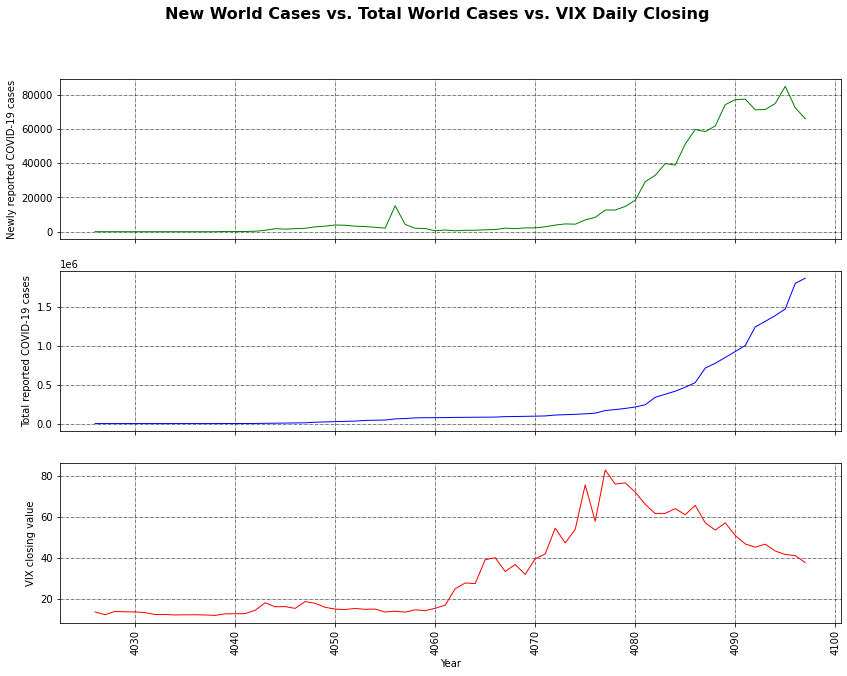

In [78]:
# # merged_df['Date']=pd.to_datetime (merged_df['Date'])
# # merged_df.set_index('Date')

# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("New World Cases vs. Total World Cases vs. VIX Daily Closing", fontsize=16, fontweight="bold")

# ax1.plot(merged_df['New Cases'], linewidth=1, color = "g")
# ax1.set_ylabel("Newly reported COVID-19 cases")

# ax2.plot(merged_df['Total Cases'], linewidth=1, color = "b")
# ax2.set_ylabel("Total reported COVID-19 cases")

# ax3.plot(merged_df['VIX Close'], linewidth=1, color="r")
# ax3.set_ylabel("VIX closing value")

# fig.set_figheight(10)
# fig.set_figwidth(14)

# ax3.set_xlabel("Year")

# plt.xticks(rotation='vertical')

# ax1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# ax2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# ax3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# plt.show()

In [ ]:
# fig, (axu1, axu2, axu3) = plt.subplots(3, sharex=True)
# fig.suptitle("New U.S. Cases vs. Total U.S. Cases vs. VIX Daily Closing", fontsize=16, fontweight="bold")

# axu1.plot(merged_us_df['New Cases'], linewidth=1, color="g")
# axu1.set_ylabel("Newly reported COVID-19 cases")

# axu2.plot(merged_us_df['Total Cases'], linewidth=1, color="b")
# axu1.set_ylabel("Total reported COVID-19 cases")

# axu3.plot(merged_us_df['VIX Close'], linewidth=1, color="r")
# axu3.set_ylabel("VIX closing value")

# fig.set_figheight(10)
# fig.set_figwidth(14)

# axu3.set_xlabel("Date")

# plt.xticks(rotation='vertical')

# axu1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# axu2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# axu3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# plt.show()